<h3 style="text-align: center;"><b>Implementing Simple Linear Regression From Scratch (with Mini- Batch Gradient Descent)</b> </h3>
<h5 style="text-align: center;"> This notebook is exactly the same as Notebook 3 except it uses Mini- Batch Gradient Descent instead of Stochastic Gradient Descent</h5>
<h5 style="text-align: center;"> <a href="https://en.wikipedia.org/wiki/Simple_linear_regression" target="_blank">https://en.wikipedia.org/wiki/Simple_linear_regression</a></h5>
<h5 style="text-align: center;">We still have <code>y = &alpha; x + &beta; </code></h5>
<h5 style="text-align: center;">And we still estimate the coeffiecients not by rewriting the formula, but by writing it in terms of a function f(&alpha;,&beta;) where &alpha; and &beta; are that in the formula.</h5>
<h5 style="text-align: center;">Again the formula we are going to make as a function is Mean Squared Error which is the square of RMSE we explored in the previous notebook</h5>
$$ \text{MSE = } \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2 $$
$$ \text{Where } \hat{y_i} \text{ we know to be } \hat{y_i} = \alpha x + \beta $$
$$ \text{This derives to } f(\alpha, \beta) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \alpha x_i - \beta)^2 $$
$$ \text{We want to take the min of this; so, } \min_{\alpha, \beta}f(\alpha, \beta) $$
$$ \text{We now want to take the partial deriv with respect to } \alpha \text{ and } \beta $$
$$ \frac{\partial f}{\partial \alpha} = \frac{1}{n} \sum_{i=1}^{n} -2x_i(y_i - \alpha x_i - \beta) \text{ and} $$
<h5 style="text-align: center;">In code:<code>(-2*sum(X*(Y - alpha*X - beta))) / n</code></h5>
$$ \frac{\partial f}{\partial \beta} = \frac{1}{n} \sum_{i=1}^{n} -2(y_i - \alpha x_i - \beta) $$
<h5 style="text-align: center;">In code:<code>(-2*sum((Y - alpha*X - beta))) / n</code></h5>
<h5 style="text-align: center;">We then multiply it by some learning rate and subtract it from the previous alpha and beta</h5>
<h5 style="text-align: center;">We do this for e number of epochs and pretty soon we converge to an optimal minima.</h5>
<h5 style="text-align: center;">The difference between the two optimization is Mini- Batch only uses a subset (not 1 batch- size) sample of &alpha; and &beta;</h5>
<h5 style="text-align: center;">The code is exactly the same except batch_size > 1 </h5>

1.0160559173448853 0.9628651319434623


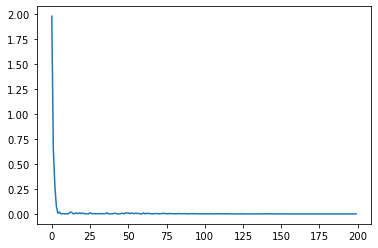

In [3]:
from random import random
import numpy as np
import matplotlib.pyplot as plt

def mini_batch_gradient_descent_for_linear_regression(X, Y, lr=0.05, epochs=1000, batch_size=3):
    """
    Batch size is how many samples to choose from X and Y. Everything else is the same as Notebook 3
    """
    alpha = random()
    beta = random()
    mse = []
    for _ in range(epochs):
        indexes = np.random.randint(0, len(X), batch_size) # outputs an array of size batch_size of random indexes from 0 to len(X)
        x_s = np.take(X, indexes) # takes elements of X at given index
        y_s = np.take(Y, indexes) # takes elements of Y at given index
        n = len(x_s)
        """
        Note: instead of all X and Y, we calculate only a subset of the X and Y array
        """
        partial_of_alpha = (-2*sum(x_s*(y_s - alpha*x_s - beta))) / n
        partial_of_beta = (-2*sum((y_s - alpha*x_s - beta))) / n
        alpha -= lr*partial_of_alpha
        beta -= lr*partial_of_beta
        mse.append(sum((y_s - alpha*x_s - beta)**2)/n)
    return alpha, beta, mse


X = np.array([1, 2, 3])
Y = np.array([2, 3, 4])
epochs = 200
batch_size = 2
alpha, beta, mse = mini_batch_gradient_descent_for_linear_regression(X, Y, epochs=epochs, batch_size=batch_size)
print(alpha, beta)
epochs_array = [x for x in range(epochs)]
plt.plot(epochs_array, mse)
plt.show()

In [4]:
class LinearRegressionUtils:
    def coefficients(self, X, Y, lr, epochs, batch_size):
        alpha = random()
        beta = random()
        for _ in range(epochs):
            indexes = np.random.randint(0, len(X), batch_size) # outputs an array of size batch_size of random indexes from 0 to len(X)
            x_s = np.take(X, indexes) # takes elements of X at given index
            y_s = np.take(Y, indexes) # takes elements of Y at given index
            n = len(x_s)
            """
            Note: instead of all X and Y, we calculate only a subset of the X and Y array
            """
            partial_of_alpha = (-2*sum(x_s*(y_s - alpha*x_s - beta))) / n
            partial_of_beta = (-2*sum((y_s - alpha*x_s - beta))) / n
            alpha -= lr*partial_of_alpha
            beta -= lr*partial_of_beta
        return alpha, beta
    
class LinearRegression(LinearRegressionUtils):
    """
    Demo Linear Regression class using Mini-Batch Gradient Descent
    """
    def fit(self, X, Y, lr=0.05, epochs=1000, batch_size=3):
        """
        X and Y to fit, lr = learning rate, epochs = num epochs to iterate over
        """
        self.X = X
        self.Y = Y
        self.lr = lr
        self.epochs = epochs
        self.coef_, self.intercept_ = LinearRegressionUtils.coefficients(self, X=self.X, Y=self.Y, lr=self.lr, epochs=self.epochs, batch_size=batch_size)
        self.predictions = []
        for i in range(len(self.X)):
            self.predictions.append(self.predict(self.X[i]))
        
    def predict(self, x):
        return self.intercept_ + self.coef_ * x

In [5]:
X = np.array([1, 2, 3])
Y = np.array([2, 3, 4])
reg = LinearRegression()
reg.fit(X, Y)
print("Alpha:", reg.coef_)
print("Beta:", reg.intercept_)
print("Prediction:", reg.predict(34))

Alpha: 1.0000015553465922
Beta: 0.9999964409344042
Prediction: 35.00004932271854


In [6]:
from sklearn.linear_model import LinearRegression
X = np.array(X).reshape(-1, 1)
y = np.array(Y).reshape(-1, 1)
reg2 = LinearRegression().fit(X, y)
print("Alpha:", reg2.coef_)
print("Beta:", reg2.intercept_)
print("Prediction:", reg2.predict(np.array(34).reshape(1, -1)))

Alpha: [[1.]]
Beta: [1.]
Prediction: [[35.]]
